<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install matplotlib-venn

  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=240029a98c48dae64bebd460078f1e8b5a23a86db6c71c81d8f8979ca3187c54
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Step 1: Display column names
print("🔹 Column names:")
print(df.columns.tolist())

# Step 2: Check data types
print("\n🔹 Data types:")
print(df.dtypes)

# Step 3: Summary information
print("\n🔹 Summary info:")
print(df.info())

# Step 4: Quick stats (optional but insightful)
print("\n🔹 Descriptive statistics:")
print(df.describe())

🔹 Column names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsync

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# Total missing values per column
print(df.isnull().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [7]:
#Impute numeric column with median (no chaining)
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

# Impute categorical column with mode (no chaining)
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [33]:
## Write your code here
#Employment distribution
print(" Employment value counts:")
print(df['Employment'].value_counts(dropna=False))

# Job Satisfaction distribution
print("\n😊 JobSat value counts:")
print(df['JobSat'].value_counts(dropna=False))

# Professional Coding Experience distribution
print("\n👩‍💻 YearsCodePro value counts:")
print(df['YearsCodePro'].value_counts(dropna=False))

 Employment value counts:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking f

In [34]:
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
bins = [0, 1, 5, 10, 20, 50, float('inf')]
labels = ['<1', '1–5', '5–10', '10–20', '20–50', '50+']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


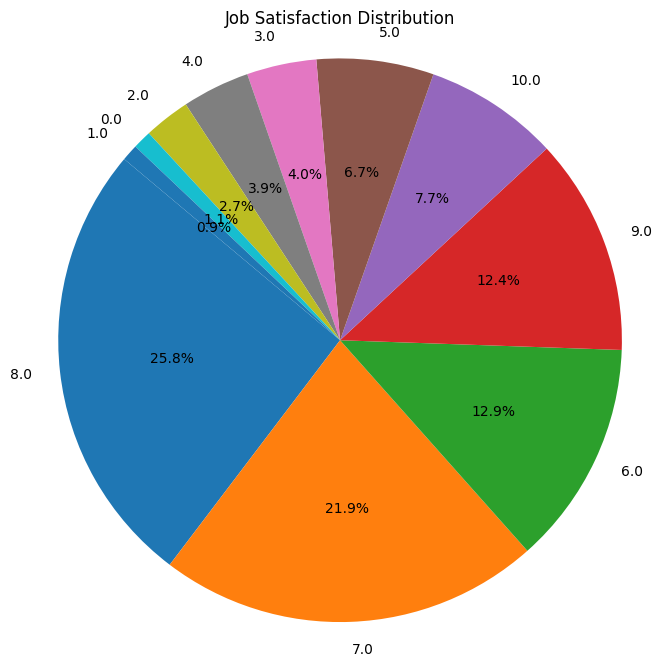

In [35]:
## Write your code here
#Create a pie chart or KDE plot to visualize the distribution of JobSat.
import matplotlib.pyplot as plt

# Drop NaNs and count value frequencies
job_sat_counts = df['JobSat'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Job Satisfaction Distribution")
plt.axis('equal')
plt.show()

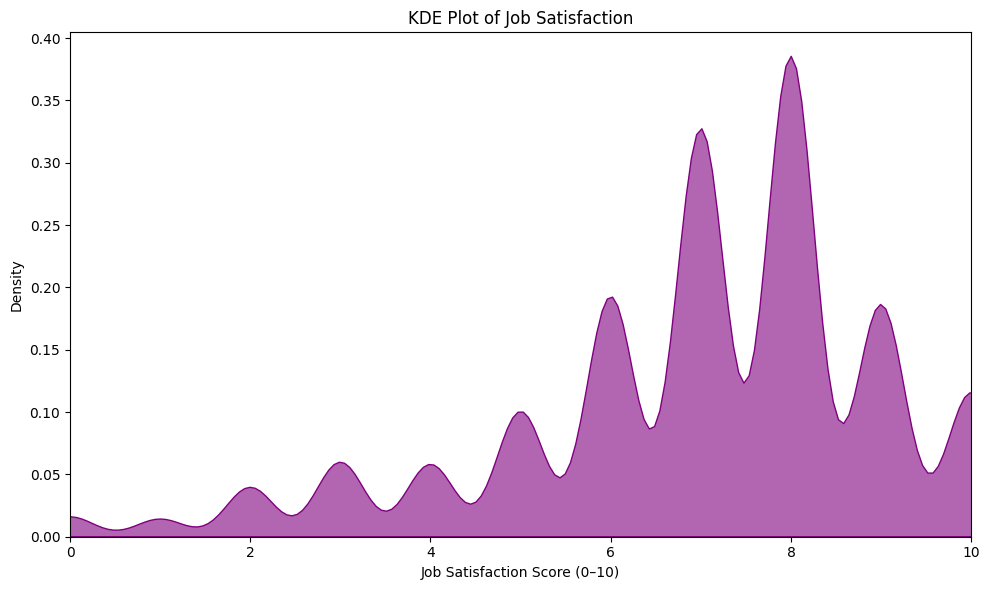

In [11]:
#KDE Plot — For Smooth Numeric Distribution
import seaborn as sns
# Convert 'JobSat' to numeric and drop missing values
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df_clean = df.dropna(subset=['JobSat'])

# Plot KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(df_clean['JobSat'], fill=True, color='purple', alpha=0.6)
plt.title("KDE Plot of Job Satisfaction")
plt.xlabel("Job Satisfaction Score (0–10)")
plt.ylabel("Density")
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [36]:
## Write your code here
from collections import Counter

# Split entries into individual languages
worked_list = df['LanguageHaveWorkedWith'].dropna().str.split(';').sum()
wanted_list = df['LanguageWantToWorkWith'].dropna().str.split(';').sum()

# Count frequencies
worked_freq = Counter(worked_list)
wanted_freq = Counter(wanted_list)

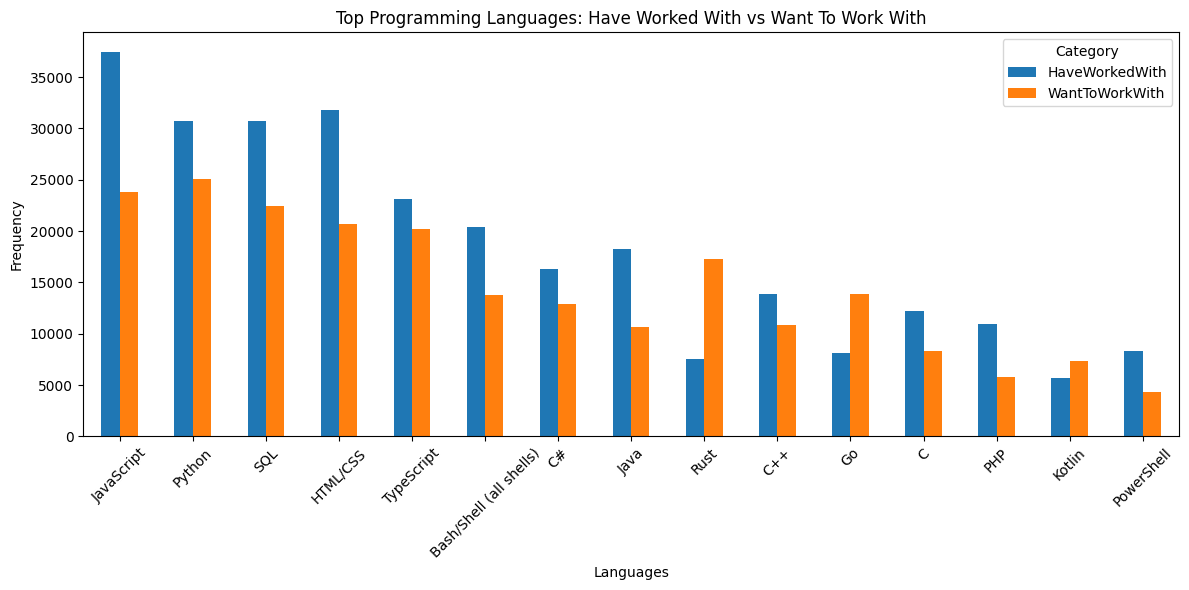

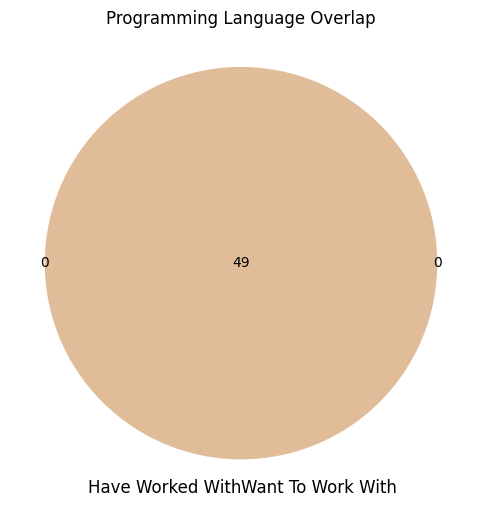

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine counts into a DataFrame
languages = list(set(worked_freq.keys()) | set(wanted_freq.keys()))
data = {
    'HaveWorkedWith': [worked_freq.get(lang, 0) for lang in languages],
    'WantToWorkWith': [wanted_freq.get(lang, 0) for lang in languages]
}
lang_df = pd.DataFrame(data, index=languages)

# Plot top 15 by total popularity
top_langs = lang_df.sum(axis=1).sort_values(ascending=False).head(15)
lang_df_top = lang_df.loc[top_langs.index]

# Bar chart
lang_df_top.plot(kind='bar', figsize=(12, 6))
plt.title("Top Programming Languages: Have Worked With vs Want To Work With")
plt.ylabel("Frequency")
plt.xlabel("Languages")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

#Venn diagram
from matplotlib_venn import venn2

# Convert to sets
set_worked = set(worked_freq.keys())
set_wanted = set(wanted_freq.keys())

# Venn diagram
plt.figure(figsize=(6, 6))
venn2([set_worked, set_wanted], set_labels=('Have Worked With', 'Want To Work With'))
plt.title("Programming Language Overlap")
plt.show()


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


### Step 7: Analyze Remote Work Trends


In [41]:
## Write your code here
# Count RemoteWork responses by region
remote_country_counts = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)


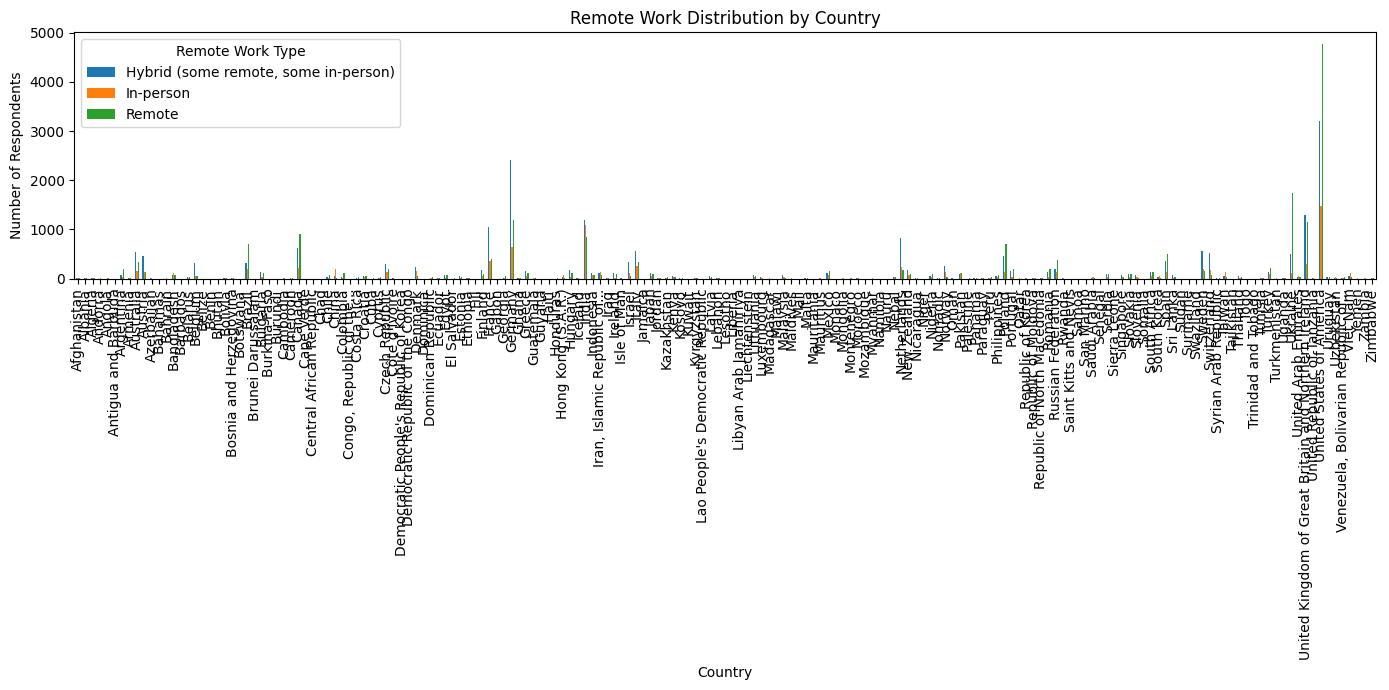

In [42]:
remote_country_counts.plot(kind='bar', stacked=False, figsize=(14, 7))
plt.title("Remote Work Distribution by Country")
plt.ylabel("Number of Respondents")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.legend(title="Remote Work Type")
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [43]:
## Write your code here
# Replace string entries in YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop rows with missing values in either column
df_corr = df.dropna(subset=['JobSat', 'YearsCodePro'])

In [44]:
from scipy.stats import pearsonr, spearmanr

# Pearson (linear relationship)
pearson_coef, pearson_p = pearsonr(df_corr['JobSat'], df_corr['YearsCodePro'])

# Spearman (monotonic relationship)
spearman_coef, spearman_p = spearmanr(df_corr['JobSat'], df_corr['YearsCodePro'])

print(f"📏 Pearson correlation: {pearson_coef:.4f} (p-value: {pearson_p:.4e})")
print(f"📐 Spearman correlation: {spearman_coef:.4f} (p-value: {spearman_p:.4e})")

📏 Pearson correlation: 0.1042 (p-value: 2.9366e-69)
📐 Spearman correlation: 0.1192 (p-value: 3.0714e-90)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [12]:
## Write your code here
import pandas as pd

# Generate cross-tab of employment vs. education level
edu_employment_ct = pd.crosstab(df['EdLevel'], df['Employment'])

# Display the table
#print(edu_employment_ct)

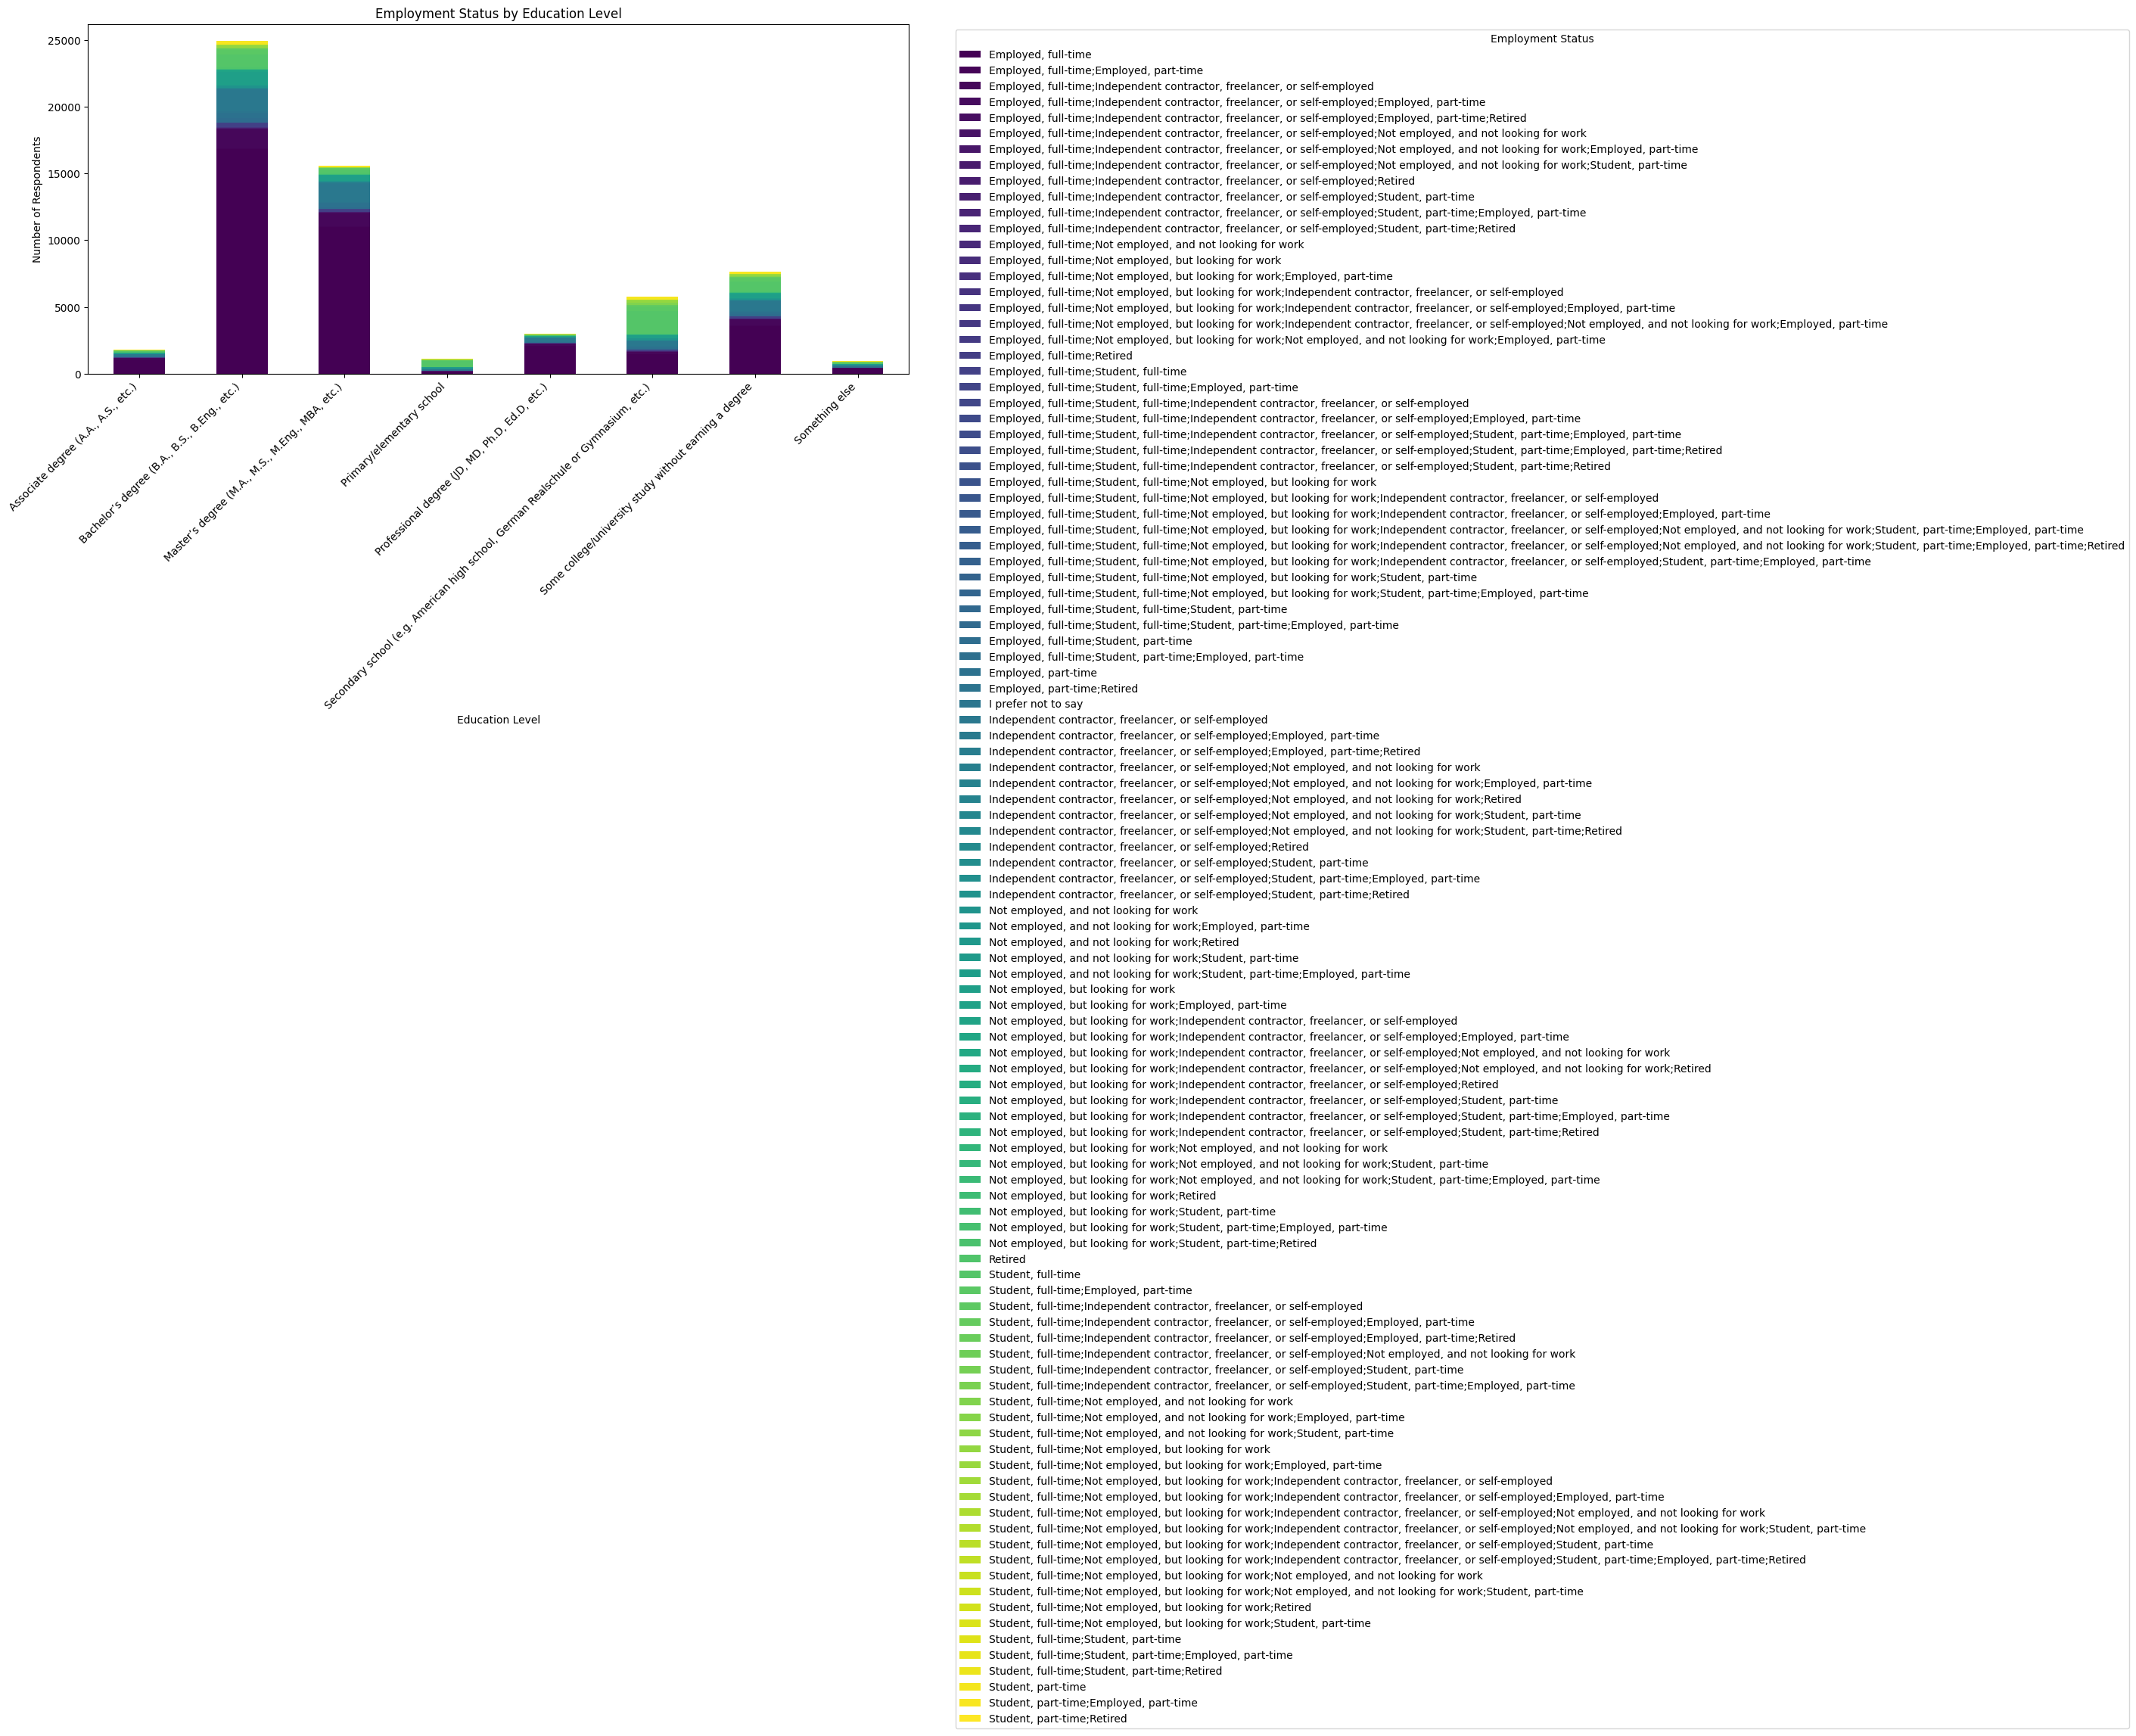

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot stacked bar chart
edu_employment_ct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='viridis')
plt.title("Employment Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Employment Status", bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(title="Employment Status", loc='upper right', fontsize='small')
#plt.tight_layout()
plt.figure(constrained_layout=True)
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [48]:
## Write your code here
# Save cleaned DataFrame to CSV
df.to_csv('cleaned_survey_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
